<a href="https://colab.research.google.com/github/abrahammathews2000/search4cyberplanet/blob/main/shape_prediction_from_lc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from PIL import Image

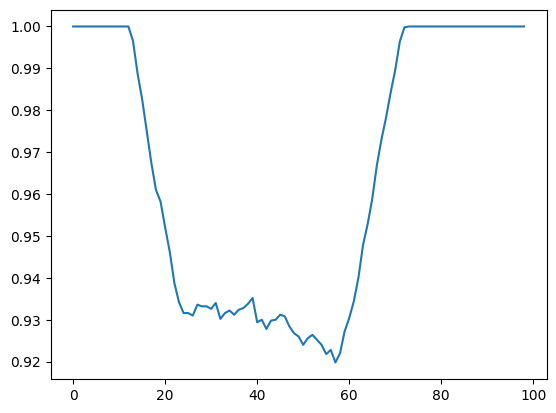

In [ ]:
# Trying to open one lc_array csv file
df = pd.read_csv('/content/drive/MyDrive/5_AstroFYP_data/lc_array/0.0_0.0_10_0lc.csv')
y = np.array(df)
#print("length of y = ",len(y))
x = np.arange(len(y))
#print(y)
#print(x)
plt.plot(x,y)
plt.show()

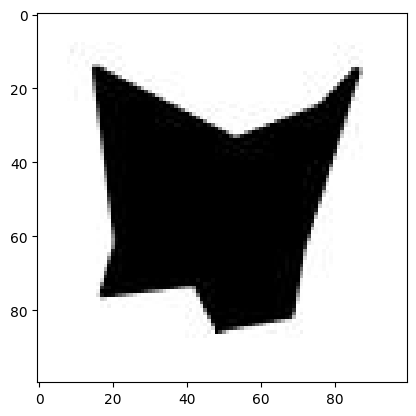

In [ ]:
img = np.asarray(Image.open('/content/drive/MyDrive/5_AstroFYP_data/shape_image/0.0_0.0_10_0.jpg'))
img = img/255.0
#print(repr(img))
plt.imshow(img)

In [ ]:
inputs = keras.Input(shape=(99,))

dense = layers.Dense(5000, activation="relu")

x = dense(inputs)
x = layers.Dense(5000, activation="relu")(x)
outputs = layers.Dense(10000)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="predict_shape_from_LC")

In [ ]:
model.summary()


Model: "predict_shape_from_LC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_3 (Dense)             (None, 5000)              505000    
                                                                 
 dense_4 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_5 (Dense)             (None, 10000)             50010000  
                                                                 
Total params: 75,520,000
Trainable params: 75,520,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputs.shape
inputs.dtype

tf.float32

Old codes

In [ ]:
model = tf.keras.models.Sequential([
    keras.layers.Dense(units=100, input_shape=[100]),
    tf.keras.layers.Dense(5000, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10000, activation=tf.nn.relu),
    tf.keras.layers.Reshape((100, 100))])
model.compile(optimizer='sgd', loss='mean_squared_error')



In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 5000)              505000    
                                                                 
 dense_21 (Dense)            (None, 10000)             50010000  
                                                                 
 reshape_2 (Reshape)         (None, 100, 100)          0         
                                                                 
Total params: 50,525,100
Trainable params: 50,525,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])